In [1]:
import numpy as np
from keras.datasets import cifar10
from keras.layers import Dense
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Flatten
from matplotlib import pyplot as plt
import sys
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.utils import to_categorical


Using TensorFlow backend.
C:\ProgramData\Anaconda3\envs\py35\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\envs\py35\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\envs\py35\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\envs\py35\lib\site-packag

In [2]:
import tensorflow as tf
tf.__version__

'1.13.1'

In [3]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7945860764310198892
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4864514457
locality {
  bus_id: 1
  links {
  }
}
incarnation: 11094957296601496385
physical_device_desc: "device: 0, name: GeForce GTX 1660 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5"
]


In [3]:
import keras.optimizers as op
from sklearn.model_selection import train_test_split

In [4]:
(trainX, trainY), (testX, testY) = cifar10.load_data()

In [5]:
trainY1=to_categorical(trainY)
testY1=to_categorical(testY)


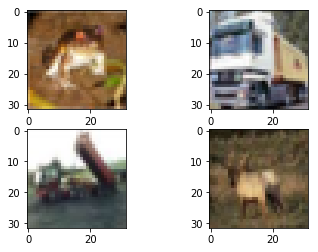

In [6]:
plt.subplot(221)
plt.imshow(trainX[0],cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(trainX[1],cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(trainX[2],cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(trainX[3],cmap=plt.get_cmap('gray'))
plt.show()

In [8]:
trainX1= trainX.astype('float32')
testX1 = testX.astype('float32')
trainX1 = trainX1 / 255.0
testX1 = testX1 / 255.0
trainX1.shape, testX1.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [9]:
def base_model1():
    model=Sequential()
    model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(32,32,3)))
    model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
    model.add(MaxPooling2D((2,2)))
    model.add(Flatten())
    model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(10,activation='softmax'))
    opti=op.SGD(lr=0.001,momentum=0.9)
    model.compile(optimizer=opti,loss='categorical_crossentropy',metrics=['accuracy'])
    return model

In [10]:
trainX2,testX2,trainY2,testY2=train_test_split(trainX1,trainY1,test_size=0.3,random_state=42)

In [11]:
trainX2.shape,testX2.shape,trainY2.shape,testY2.shape


((35000, 32, 32, 3), (15000, 32, 32, 3), (35000, 10), (15000, 10))

In [ ]:
model=base_model1()
history=model.fit(trainX2,trainY2,epochs=100,batch_size=64,validation_data=(testX2,testY2),verbose=2)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 35000 samples, validate on 15000 samples
Epoch 1/100


In [13]:
_,acc=model.evaluate(testX1,testY1,verbose=0)
print(acc*100)

63.8700008392334


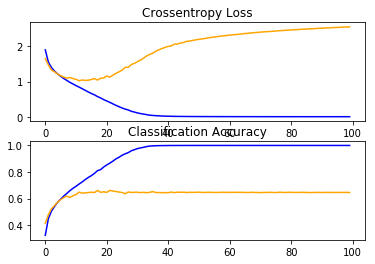

In [15]:
plt.subplot(211)
plt.title('Crossentropy Loss')
plt.plot(history.history['loss'],color='blue',label='train')
plt.plot(history.history['val_loss'],color='orange',label='test')
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')

In [22]:
def base_model2():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opti = op.SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opti, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [23]:
model2=base_model2()
history=model2.fit(trainX2,trainY2,epochs=100,batch_size=64,validation_data=(testX2,testY2),verbose=2)

Train on 35000 samples, validate on 15000 samples
Epoch 1/100
 - 21s - loss: 2.1130 - accuracy: 0.2061 - val_loss: 1.8685 - val_accuracy: 0.3415
Epoch 2/100
 - 21s - loss: 1.8119 - accuracy: 0.3314 - val_loss: 1.6996 - val_accuracy: 0.3811
Epoch 3/100
 - 22s - loss: 1.6622 - accuracy: 0.3880 - val_loss: 1.5610 - val_accuracy: 0.4279
Epoch 4/100
 - 22s - loss: 1.5634 - accuracy: 0.4261 - val_loss: 1.4478 - val_accuracy: 0.4774
Epoch 5/100
 - 22s - loss: 1.4829 - accuracy: 0.4553 - val_loss: 1.4028 - val_accuracy: 0.5001
Epoch 6/100
 - 22s - loss: 1.4183 - accuracy: 0.4863 - val_loss: 1.3372 - val_accuracy: 0.5233
Epoch 7/100
 - 22s - loss: 1.3661 - accuracy: 0.5026 - val_loss: 1.2559 - val_accuracy: 0.5541
Epoch 8/100
 - 20s - loss: 1.3081 - accuracy: 0.5256 - val_loss: 1.2369 - val_accuracy: 0.5529
Epoch 9/100
 - 22s - loss: 1.2693 - accuracy: 0.5414 - val_loss: 1.1568 - val_accuracy: 0.5875
Epoch 10/100
 - 22s - loss: 1.2199 - accuracy: 0.5613 - val_loss: 1.1110 - val_accuracy: 0.6058

Epoch 86/100
 - 22s - loss: 0.3090 - accuracy: 0.8892 - val_loss: 0.6101 - val_accuracy: 0.8126
Epoch 87/100
 - 23s - loss: 0.3152 - accuracy: 0.8854 - val_loss: 0.6039 - val_accuracy: 0.8126
Epoch 88/100
 - 21s - loss: 0.3040 - accuracy: 0.8891 - val_loss: 0.6204 - val_accuracy: 0.8123
Epoch 89/100
 - 21s - loss: 0.3004 - accuracy: 0.8927 - val_loss: 0.6183 - val_accuracy: 0.8095
Epoch 90/100
 - 20s - loss: 0.2952 - accuracy: 0.8923 - val_loss: 0.6184 - val_accuracy: 0.8076
Epoch 91/100
 - 21s - loss: 0.2920 - accuracy: 0.8947 - val_loss: 0.5964 - val_accuracy: 0.8149
Epoch 92/100
 - 21s - loss: 0.2824 - accuracy: 0.8982 - val_loss: 0.6131 - val_accuracy: 0.8167
Epoch 93/100
 - 21s - loss: 0.2847 - accuracy: 0.8985 - val_loss: 0.6149 - val_accuracy: 0.8128
Epoch 94/100
 - 21s - loss: 0.2827 - accuracy: 0.8991 - val_loss: 0.6084 - val_accuracy: 0.8153
Epoch 95/100
 - 20s - loss: 0.2818 - accuracy: 0.8970 - val_loss: 0.6220 - val_accuracy: 0.8131
Epoch 96/100
 - 20s - loss: 0.2717 - acc

In [24]:
_,acc=model2.evaluate(testX1,testY1,verbose=0)
print(acc*100)

81.01999759674072


In [32]:
model2.save('final_model.h5')

In [12]:
from keras.models import load_model    
model_fin = load_model('final_model.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [13]:
_, acc = model_fin.evaluate(testX1, testY1, verbose=0)
print('> %.3f' % (acc * 100.0))

> 81.020


In [15]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import LabelEncoder
img=load_img('sample_image.png',target_size=(32,32))
img=img_to_array(img)
img=img.reshape(1,32,32,3)
img=img.astype('float32')
img=img/255.0


In [16]:
result = model_fin.predict_classes(img)

In [17]:
result

array([4], dtype=int64)

NameError: name 'testX' is not defined

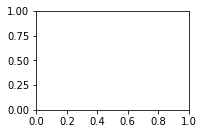

In [2]:
plt.subplot(221)
plt.imshow(testX[0],cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(testX[1],cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(testX[2],cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(testX[3],cmap=plt.get_cmap('gray'))
plt.show()

In [20]:
testY[0],testY[1],testY[2],testY[3]

(array([3]), array([8]), array([8]), array([0]))

In [21]:
y_pred=model_fin.predict_classes(testX)

In [23]:
y_pred[0],y_pred[1],y_pred[2],y_pred[3]

(3, 8, 8, 0)

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

In [42]:
match=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
val_list = list()
for val in y_pred:
    val_list.append(match[val])

In [48]:
val_list[2]

'ship'

In [38]:
match[0]

'airplane'